In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
#it gives all Columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
data.columns.value_counts().sum()

12

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# It wiil give null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [59]:
data['Age'].median()

28.0

In [60]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [61]:
# Handling missing values
#age is often assumed to follow a somewhat normal distribution, making the median a good measure of central tendency
data['Age'].fillna(data['Age'].median(), inplace=True)

#Embarked Imputing with the mode ensures that the missing values are replaced with the most likely value based on the available data
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


#If the "Cabin" feature has a high proportion of missing values (which is often the case),we might choose to ignore it and not #include it in analysis


In [63]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [64]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [65]:
# shows statistical summary of the dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [66]:
# It rename the SEX feature to GENDER for better understanding of datasets
data.rename(columns = {'Sex':'Gender'}, inplace = True)

In [77]:
data['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

## Visualization

In [78]:
data.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

In [ ]:
# 1. Bar Plot: Count of Survived vs. Not Survived
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Survived vs. Not Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

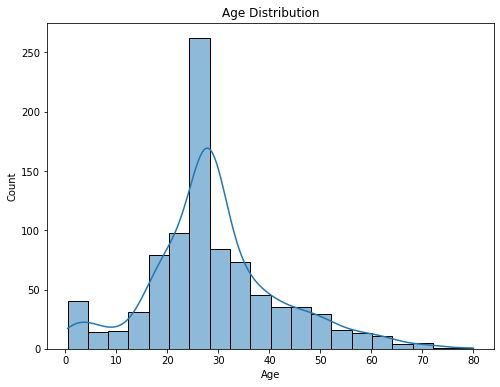

In [80]:
# 2. Histogram: Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

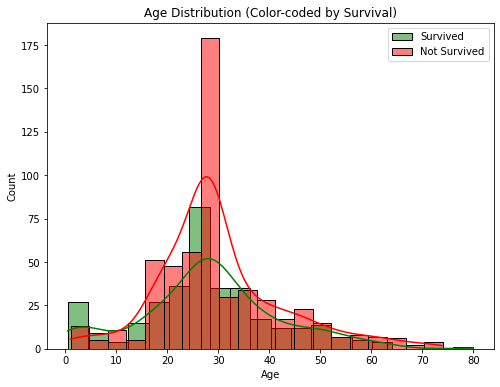

In [81]:
# 3. Histogram: Age Distribution with different colors
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Survived'] == 1]['Age'].dropna(), kde=True, color='g', label='Survived', bins=20)
sns.histplot(data[data['Survived'] == 0]['Age'].dropna(), kde=True, color='r', label='Not Survived', bins=20)
plt.title('Age Distribution (Color-coded by Survival)')
plt.xlabel('Age')
plt.legend()
plt.show()

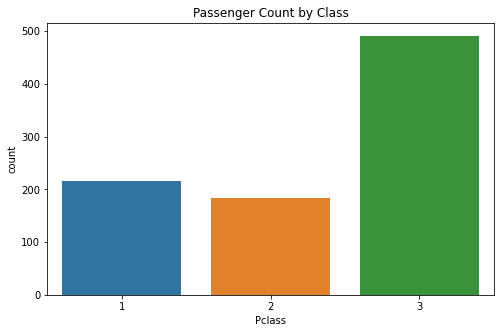

In [82]:
# 4."Pclass" variable represents (Passenger Class) first class (1), second class (2), or third class (3) on the Titanic.
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Count by Class')
plt.show()

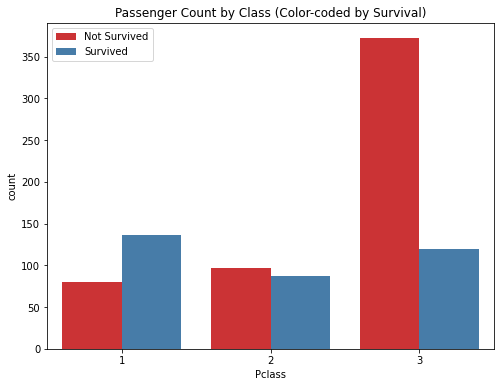

In [83]:
# 5. pclass count on survived vs non survived
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, hue='Survived', palette='Set1')
plt.title('Passenger Count by Class (Color-coded by Survival)')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [84]:
data['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

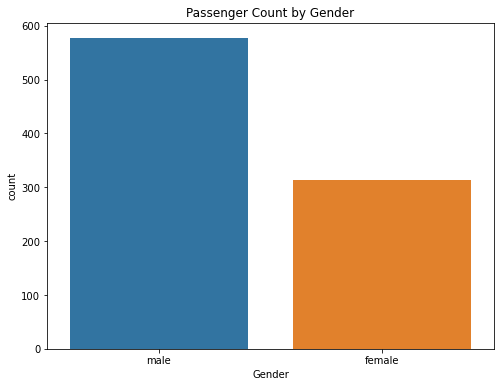

In [85]:
# 6. Bar Plot: Count of Passengers by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Passenger Count by Gender')
plt.show()

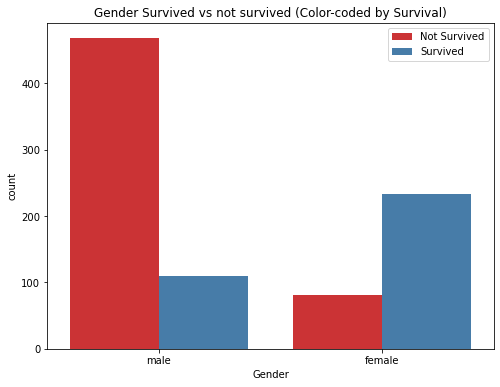

In [86]:
# 7. count by gender on survived vs not survived
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, hue='Survived', palette='Set1')
plt.title('Gender Survived vs not survived (Color-coded by Survival)')
plt.legend(['Not Survived', 'Survived'])
plt.show()

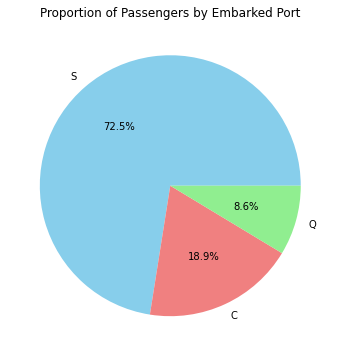

In [87]:
# 8. Pie Chart: Proportion of Passengers by Embarked Port with different colors
#C (Cherbourg): Passengers who boarded the Titanic at the port of Cherbourg, France.
#Q (Queenstown): Passengers who boarded the Titanic at the port of Queenstown (now known as Cobh), Ireland.
#S (Southampton): Passengers who boarded the Titanic at the port of Southampton, England.

plt.figure(figsize=(8, 6))
data['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Proportion of Passengers by Embarked Port')
plt.ylabel('')
plt.show()

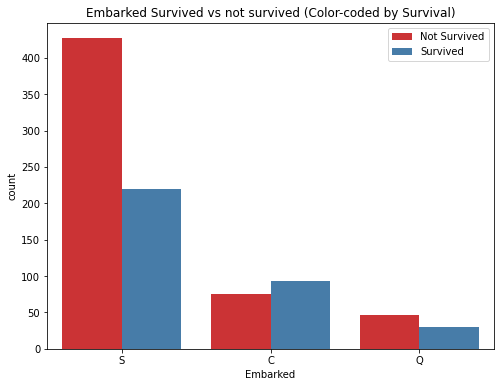

In [88]:
#9. Embarked count by Survived vs not survived
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=data, hue='Survived', palette='Set1')
plt.title('Embarked Survived vs not survived (Color-coded by Survival)')
plt.legend(['Not Survived', 'Survived'])
plt.show()

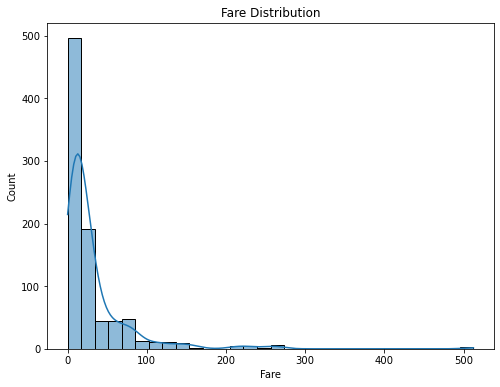

In [89]:
# 10. Histogram: Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

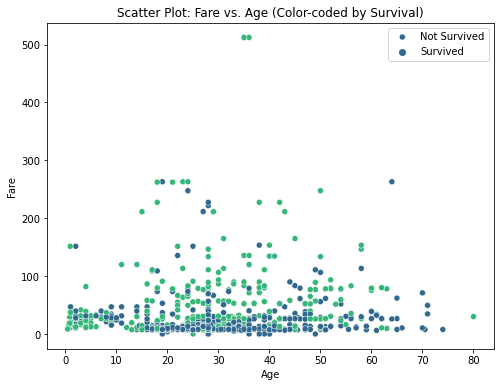

In [90]:
# 11. Scatter Plot: Fare vs. Age with different colors
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived', palette='viridis')
plt.title('Scatter Plot: Fare vs. Age (Color-coded by Survival)')
plt.legend(['Not Survived', 'Survived'])
plt.show()

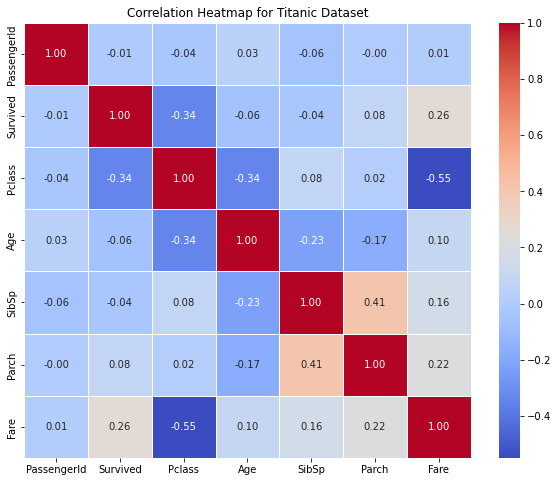

In [91]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Titanic Dataset')
plt.show()

In [92]:
#feature engineering 
#selecting some important features for model evaluation
features = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data[features].head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
# Encoding categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [94]:
features = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data[features].head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [95]:
# Feature selection
features = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Feature Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Accuracy: 0.80
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



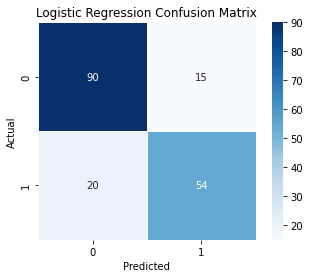

Logistic Regression ROC-AUC Score: 0.88

Random Forest Accuracy: 0.82
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



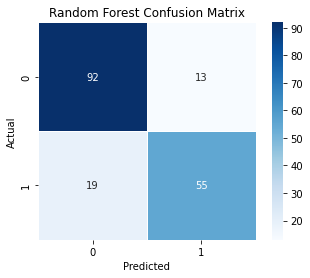

Random Forest ROC-AUC Score: 0.90

Support Vector Machine Accuracy: 0.78
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



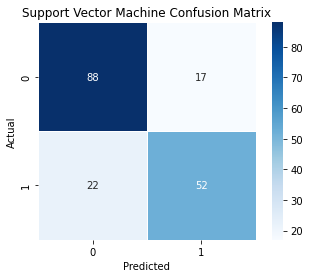

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the models
models = [logistic_model, rf_model, svm_model]
model_names = ["Logistic Regression", "Random Forest", "Support Vector Machine"]

for model, model_name in zip(models, model_names):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    # Generate and display the classification report
    report = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n{report}")
    
    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Calculate and print the ROC-AUC score
    if model_name != "Support Vector Machine":  # SVM doesn't output probabilities
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"{model_name} ROC-AUC Score: {roc_auc:.2f}\n")

#### Tuning of models 

In [177]:
# Create a list of models and their hyperparameters

models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
]

# Iterate through the models, perform hyperparameter tuning, and evaluate
for model_info in models:
    model = model_info['model']
    params = model_info['params']
    model_name = model_info['name']

    # Create a GridSearchCV object to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

    # Fit the model to the training data with cross-validation
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}:", best_params)

    # Train the model with the best hyperparameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy on Test Set:", accuracy)
    print()

Best Hyperparameters for Logistic Regression: {'C': 0.01}
Logistic Regression Accuracy on Test Set: 0.7877094972067039

Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy on Test Set: 0.8156424581005587

Best Hyperparameters for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine Accuracy on Test Set: 0.8156424581005587

